# Forecast Tutorial

This tutorial will walk through forecast data from Unidata forecast model data using the forecast.py module within pvlib.

Table of contents:
1. [Setup](#Setup)
2. [Intialize and Test Each Forecast Model](#Instantiate-GFS-forecast-model)

This tutorial has been tested against the following package versions:
* Python 3.5.2
* IPython 5.0.0
* pandas 0.18.0
* matplotlib 1.5.1
* netcdf4 1.2.1
* siphon 0.4.0

It should work with other Python and Pandas versions. It requires pvlib >= 0.3.0 and IPython >= 3.0.

Authors:
* Derek Groenendyk (@moonraker), University of Arizona, November 2015
* Will Holmgren (@wholmgren), University of Arizona, November 2015, January 2016, April 2016, July 2016

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

c:\users\kanderso\software\anaconda3\envs\pvlib-dev\lib\site-packages\pvlib\forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 32.2
longitude = -110.9 
tz = 'America/Phoenix'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=7) # 7 days from today
print(start, end)

2020-07-07 00:00:00-07:00 2020-07-14 00:00:00-07:00


## GFS (0.5 deg)

In [3]:
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP 

In [4]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

In [5]:
# retrieve data
data = fm.get_data(latitude, longitude, start, end)

In [6]:
data[sorted(data.columns)]

,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,Temperature_surface,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Wind_speed_gust_surface,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2020-07-07 09:00:00-07:00,0.0,300.237488,0.0,0.0,57.0,0.0,0.0,57.0,1.955965,1.875361,-0.662417
2020-07-07 12:00:00-07:00,0.0,298.100006,0.0,0.0,59.0,0.0,0.0,59.0,3.808908,3.145774,2.099924
2020-07-07 15:00:00-07:00,180.0,310.383728,0.0,0.0,0.0,0.0,0.0,0.0,3.342430,1.852296,2.729048
2020-07-07 18:00:00-07:00,467.0,327.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.484897,0.939204,-3.090686
2020-07-07 21:00:00-07:00,1010.0,330.007477,0.0,0.0,0.0,0.0,0.0,0.0,3.503251,1.645287,-3.527871
2020-07-08 00:00:00-07:00,878.0,319.885193,0.0,0.0,0.0,0.0,0.0,0.0,4.145447,0.859436,-4.305269
2020-07-08 03:00:00-07:00,175.0,305.436615,0.0,0.0,0.0,0.0,0.0,0.0,3.496038,-2.588877,-2.352002
2020-07-08 06:00:00-07:00,88.0,303.200012,0.0,0.0,0.0,0.0,0.0,0.0,5.642923,4.412341,-0.192209
2020-07-08 09:00:00-07:00,0.0,301.231689,0.0,0.0,0.0,0.0,0.0,0.0,11.133477,2.878274,7.444138
2020-07-08 12:00:00-07:00,0.0,298.600006,0.0,0.0,0.0,0.0,0.0,0.0,3.954767,1.669788,2.695730


In [7]:
data = fm.process_data(data)

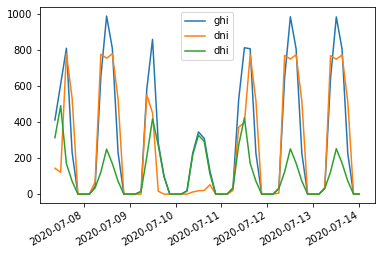

In [8]:
data[['ghi', 'dni', 'dhi']].plot();

In [9]:
cs = fm.location.get_clearsky(data.index)

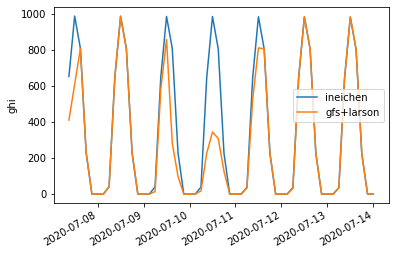

In [10]:
fig, ax = plt.subplots()
cs['ghi'].plot(ax=ax, label='ineichen')
data['ghi'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('ghi')
ax.legend();

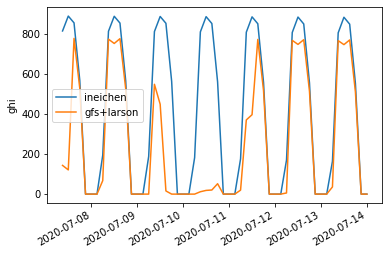

In [11]:
fig, ax = plt.subplots()
cs['dni'].plot(ax=ax, label='ineichen')
data['dni'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('ghi')
ax.legend();

In [12]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [13]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-07-07 09:00:00-07:00,313.248107,143.860292,411.558827,0.0,0.0,57.0,27.087494,57.0,1.988913
2020-07-07 12:00:00-07:00,491.012347,121.402886,609.925582,0.0,0.0,59.0,24.950012,59.0,3.782271
2020-07-07 15:00:00-07:00,168.912693,780.228478,809.627894,0.0,0.0,0.0,37.233734,0.0,3.298288
2020-07-07 18:00:00-07:00,70.760082,530.377043,230.422477,0.0,0.0,0.0,53.850006,0.0,3.230239
2020-07-07 21:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,56.857483,0.0,3.892665
2020-07-08 00:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,46.735199,0.0,4.390213
2020-07-08 03:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,32.286621,0.0,3.497742
2020-07-08 06:00:00-07:00,34.862378,67.546325,41.944462,0.0,0.0,0.0,30.050018,0.0,4.416526
2020-07-08 09:00:00-07:00,122.512815,776.323959,652.254371,0.0,0.0,0.0,28.081696,0.0,7.981206
2020-07-08 12:00:00-07:00,249.427638,754.817268,988.451127,0.0,0.0,0.0,25.450012,0.0,3.170986


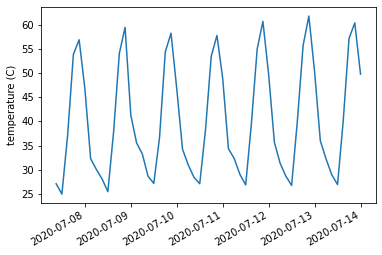

In [14]:
data['temp_air'].plot()
plt.ylabel('temperature (%s)' % fm.units['temp_air']);

In [15]:
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

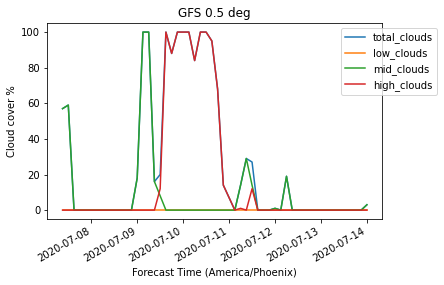

In [16]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0));

In [17]:
total_cloud_cover = data['total_clouds']

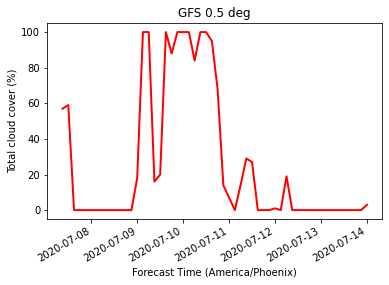

In [18]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg');

## GFS (0.25 deg)

In [19]:
# GFS model at 0.25 degree resolution
fm = GFS(resolution='quarter')

In [20]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

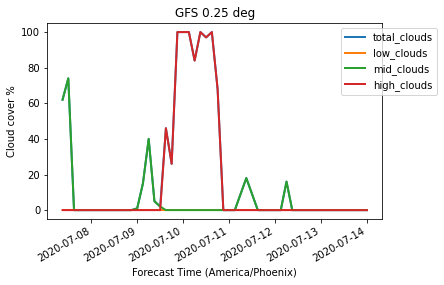

In [21]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.25 deg')
plt.legend(bbox_to_anchor=(1.18,1.0));

In [22]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-07-07 09:00:00-07:00,310.839136,116.292585,390.310736,0.0,0.0,62.0,34.575043,62.0,1.787665
2020-07-07 12:00:00-07:00,453.770869,60.944245,513.465309,0.0,0.0,74.0,32.850006,74.0,2.423746
2020-07-07 15:00:00-07:00,168.912693,780.228478,809.627894,0.0,0.0,0.0,37.496277,0.0,1.410278
2020-07-07 18:00:00-07:00,70.760082,530.377043,230.422477,0.0,0.0,0.0,48.050018,0.0,3.543175
2020-07-07 21:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,52.350006,0.0,4.786015
2020-07-08 00:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,48.335205,0.0,4.732661
2020-07-08 03:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,40.649994,0.0,3.480565
2020-07-08 06:00:00-07:00,34.862378,67.546325,41.944462,0.0,0.0,0.0,36.850006,0.0,6.538927
2020-07-08 09:00:00-07:00,122.512815,776.323959,652.254371,0.0,0.0,0.0,34.904907,0.0,3.320535
2020-07-08 12:00:00-07:00,249.427638,754.817268,988.451127,0.0,0.0,0.0,33.149994,0.0,2.014901


## NAM

In [23]:
fm = NAM()

In [24]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

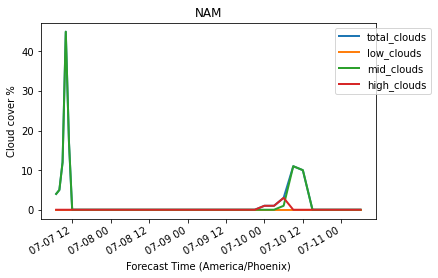

In [25]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0));

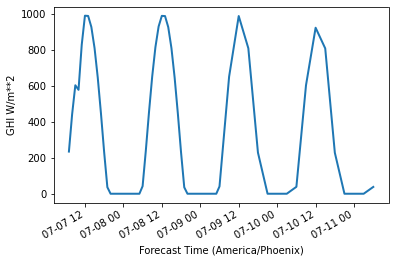

In [26]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')');

In [27]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-07-07 07:00:00-07:00,77.796838,503.843144,234.225562,0.0,0.0,4.0,25.275696,4.0,4.236579
2020-07-07 08:00:00-07:00,104.009679,665.030760,441.350258,0.0,0.0,5.0,24.096741,5.0,2.084390
2020-07-07 09:00:00-07:00,190.737687,602.967499,602.791408,0.0,0.0,12.0,23.259369,12.0,2.430394
2020-07-07 10:00:00-07:00,394.900880,220.640944,577.332947,0.0,0.0,45.0,22.637360,45.0,2.287011
2020-07-07 11:00:00-07:00,371.471781,491.815818,827.792990,0.0,0.0,17.0,21.548645,17.0,2.146314
...,...,...,...,...,...,...,...,...,...
2020-07-10 18:00:00-07:00,71.608260,521.593060,227.831386,0.0,0.0,0.0,47.524323,0.0,4.186076
2020-07-10 21:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,51.004333,0.0,4.479259
2020-07-11 00:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,45.404327,0.0,5.495673
2020-07-11 03:00:00-07:00,0.000000,0.000000,0.000000,0.0,0.0,0.0,33.342041,0.0,6.391275


## NDFD

In [28]:
fm = NDFD()

In [29]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [30]:
total_cloud_cover = data['total_clouds']
temp = data['temp_air']
wind = data['wind_speed']

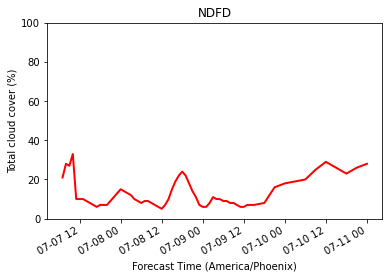

In [31]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NDFD')
plt.ylim(0,100);

Text(0.5, 0, 'Forecast Time (America/Phoenix)')

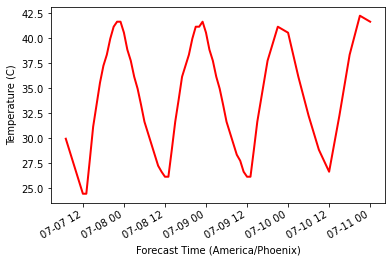

In [32]:
temp.plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.units['temp_air'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

Text(0.5, 0, 'Forecast Time (America/Phoenix)')

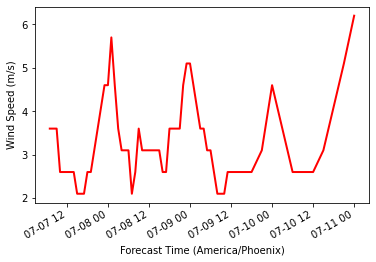

In [33]:
wind.plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

In [34]:
data[sorted(data.columns)]

,dhi,dni,ghi,temp_air,total_clouds,wind_speed
2020-07-07 07:00:00-07:00,99.890925,347.091344,207.652749,29.950012,21.0,3.6
2020-07-07 08:00:00-07:00,184.088292,372.718701,373.151942,28.850006,28.0,3.6
2020-07-07 09:00:00-07:00,267.819401,396.893774,539.047214,27.750000,27.0,3.6
2020-07-07 10:00:00-07:00,369.615267,328.202640,640.982335,26.649994,33.0,2.6
2020-07-07 11:00:00-07:00,329.899278,582.259130,870.136458,25.550018,10.0,2.6
...,...,...,...,...,...,...
2020-07-10 12:00:00-07:00,435.480046,373.322681,800.656204,26.649994,29.0,2.6
2020-07-10 15:00:00-07:00,328.683112,417.412468,671.180334,32.250000,26.0,3.1
2020-07-10 18:00:00-07:00,99.200042,315.749296,193.770591,38.350006,23.0,4.1
2020-07-10 21:00:00-07:00,0.000000,0.000000,0.000000,42.250000,26.0,5.1


## RAP

In [35]:
fm = RAP(resolution=20)

In [36]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [37]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

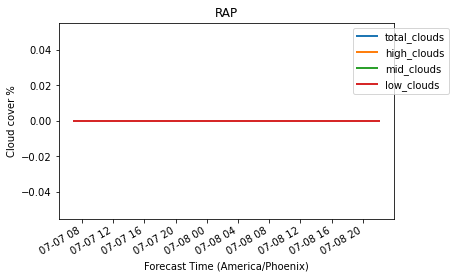

In [38]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0));

In [39]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-07-07 07:00:00-07:00,71.635540,543.826680,240.477996,0.0,0.0,0.0,28.347504,0.0,2.327517
2020-07-07 08:00:00-07:00,86.596496,728.586324,456.175991,0.0,0.0,0.0,27.904663,0.0,2.175546
2020-07-07 09:00:00-07:00,122.236626,777.829389,653.786825,0.0,0.0,0.0,26.495667,0.0,1.384346
2020-07-07 10:00:00-07:00,171.241827,779.819561,816.018322,0.0,0.0,0.0,25.294281,0.0,1.382019
2020-07-07 11:00:00-07:00,219.288315,766.669947,930.627284,0.0,0.0,0.0,24.858032,0.0,2.235861
2020-07-07 12:00:00-07:00,248.835940,756.003554,989.335867,0.0,0.0,0.0,23.831116,0.0,1.536941
2020-07-07 13:00:00-07:00,248.107815,756.279866,987.969156,0.0,0.0,0.0,23.937256,0.0,1.048759
2020-07-07 14:00:00-07:00,217.396559,767.306217,926.616347,0.0,0.0,0.0,30.558380,0.0,1.808497
2020-07-07 15:00:00-07:00,168.912693,780.228478,809.627894,0.0,0.0,0.0,36.067719,0.0,1.068781
2020-07-07 16:00:00-07:00,120.244061,776.950602,645.449998,0.0,0.0,0.0,40.855499,0.0,2.179613


## HRRR

In [40]:
fm = HRRR()

In [41]:
data_raw = fm.get_data(latitude, longitude, start, end)

In [42]:
# The HRRR model pulls in u, v winds for 2 layers above ground (10 m, 80 m)
# They are labeled as _0, _1 in the raw data
data_raw[sorted(data_raw.columns)]

,High_cloud_cover_high_cloud,Low_cloud_cover_low_cloud,Medium_cloud_cover_middle_cloud,Pressure_surface,Temperature_height_above_ground,Total_cloud_cover_entire_atmosphere,Wind_speed_gust_surface,u-component_of_wind_height_above_ground_0,u-component_of_wind_height_above_ground_1,v-component_of_wind_height_above_ground_0,v-component_of_wind_height_above_ground_1
2020-07-07 07:00:00-07:00,0.0,0.0,0.000,92405.796875,303.080902,0.000,3.313515,2.322375,1.645506,1.905790,1.961100
2020-07-07 08:00:00-07:00,0.0,0.0,0.000,92417.179688,302.527344,0.000,3.688914,1.022413,1.033438,1.896727,3.745087
2020-07-07 09:00:00-07:00,0.0,0.0,0.000,92431.882812,301.572510,0.000,3.759586,0.053196,-1.240793,1.954304,3.913967
2020-07-07 10:00:00-07:00,0.0,0.0,0.000,92445.476562,300.629303,0.000,4.403845,1.118842,0.075386,2.179615,4.983353
2020-07-07 11:00:00-07:00,0.0,0.0,0.000,92506.515625,299.980896,0.000,5.306301,-0.180458,-2.119454,2.453848,5.835173
2020-07-07 12:00:00-07:00,0.0,0.0,0.000,92555.828125,299.130402,0.000,3.395902,-0.486989,-2.939567,1.794128,2.667837
2020-07-07 13:00:00-07:00,0.0,0.0,0.000,92599.953125,298.860016,0.000,3.230673,-0.767715,-3.777448,1.082680,1.215752
2020-07-07 14:00:00-07:00,0.0,0.0,0.000,92607.460938,302.973572,0.000,3.339937,-1.793591,-2.573579,1.352917,1.792833
2020-07-07 15:00:00-07:00,0.0,0.0,0.000,92658.218750,303.510864,0.000,1.372718,-0.761702,-0.671016,0.923881,1.145391
2020-07-07 16:00:00-07:00,0.0,0.0,0.000,92654.992188,305.878174,0.000,2.019205,0.478144,0.959096,0.767871,0.725159


In [43]:
data = fm.get_processed_data(latitude, longitude, start, end)

In [44]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

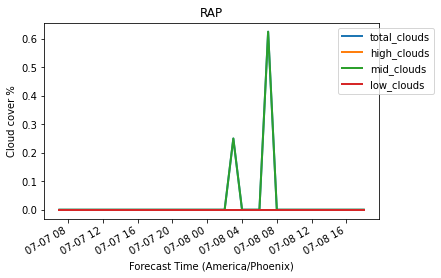

In [45]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0));

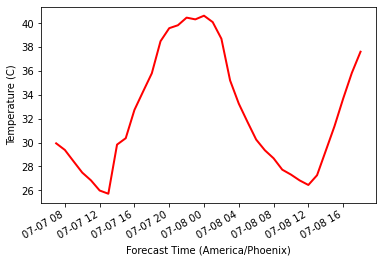

In [46]:
data['temp_air'].plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.units['temp_air'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')');

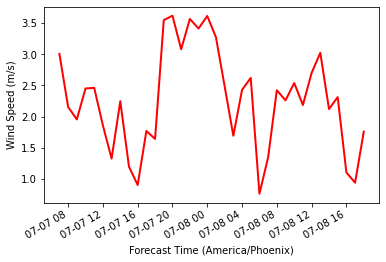

In [47]:
data['wind_speed'].plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')');

In [48]:
data[sorted(data.columns)]

,dhi,dni,ghi,high_clouds,low_clouds,mid_clouds,temp_air,total_clouds,wind_speed
2020-07-07 07:00:00-07:00,71.635540,543.826680,240.477996,0.0,0.0,0.000,29.930908,0.000,3.004241
2020-07-07 08:00:00-07:00,86.596496,728.586324,456.175991,0.0,0.0,0.000,29.377350,0.000,2.154739
2020-07-07 09:00:00-07:00,122.236626,777.829389,653.786825,0.0,0.0,0.000,28.422516,0.000,1.955028
2020-07-07 10:00:00-07:00,171.241827,779.819561,816.018322,0.0,0.0,0.000,27.479309,0.000,2.450006
2020-07-07 11:00:00-07:00,219.288315,766.669947,930.627284,0.0,0.0,0.000,26.830902,0.000,2.460474
2020-07-07 12:00:00-07:00,248.835940,756.003554,989.335867,0.0,0.0,0.000,25.980408,0.000,1.859047
2020-07-07 13:00:00-07:00,248.107815,756.279866,987.969156,0.0,0.0,0.000,25.710022,0.000,1.327246
2020-07-07 14:00:00-07:00,217.396559,767.306217,926.616347,0.0,0.0,0.000,29.823578,0.000,2.246631
2020-07-07 15:00:00-07:00,168.912693,780.228478,809.627894,0.0,0.0,0.000,30.360870,0.000,1.197391
2020-07-07 16:00:00-07:00,120.244061,776.950602,645.449998,0.0,0.0,0.000,32.728180,0.000,0.904570


## HRRR (ESRL)

In [49]:
# NBVAL_SKIP
fm = HRRR_ESRL()

c:\users\kanderso\software\anaconda3\envs\pvlib-dev\lib\site-packages\pvlib\forecast.py:803: UserWarning: HRRR_ESRL is an experimental model and is not always available.
  warnings.warn('HRRR_ESRL is an experimental model and is not '


In [ ]:
# retrieve data
# NBVAL_SKIP
data = fm.get_processed_data(latitude, longitude, start, end)

In [ ]:
# NBVAL_SKIP
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [ ]:
# NBVAL_SKIP
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR_ESRL')
plt.legend(bbox_to_anchor=(1.18,1.0));

In [ ]:
# NBVAL_SKIP
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')');

## Quick power calculation

In [51]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam('SandiaMod')
sapm_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

system = PVSystem(module_parameters=module,
                  inverter_parameters=inverter,
                  surface_tilt=latitude,
                  surface_azimuth=180)

# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(weather=fx_data)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

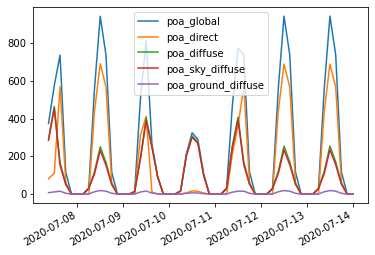

In [52]:
mc.total_irrad.plot();

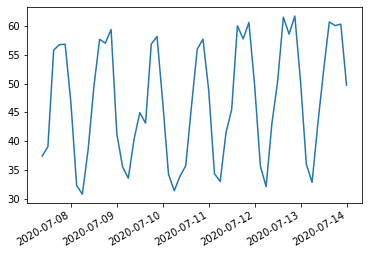

In [53]:
mc.cell_temperature.plot();

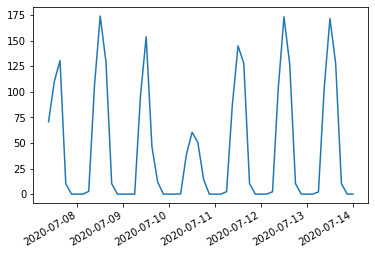

In [54]:
mc.ac.plot();